<a href="https://colab.research.google.com/github/danakrasznai/QM2/blob/main/RDD_on_Ronaldo_Effect_on_Coca_Cola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv ('multiTimeline-3.csv')
data


,Day,Popularity Index
0,2021.06.01,6
1,2021-06-02,7
2,2021-06-03,8
3,2021-06-04,9
4,2021-06-05,7
5,2021-06-06,8
6,2021-06-07,10
7,2021-06-08,9
8,2021-06-09,9
9,2021-06-10,9


In [ ]:
print(data.columns)

Index(['Day', ' Popularity Index'], dtype='object')


In [ ]:
data['Day'] = pd.to_datetime(data['Day'])

data['Day']

0    2021-06-01
1    2021-06-02
2    2021-06-03
3    2021-06-04
4    2021-06-05
5    2021-06-06
6    2021-06-07
7    2021-06-08
8    2021-06-09
9    2021-06-10
10   2021-06-11
11   2021-06-12
12   2021-06-13
13   2021-06-14
14   2021-06-15
15   2021-06-16
16   2021-06-17
17   2021-06-18
18   2021-06-19
19   2021-06-20
20   2021-06-21
21   2021-06-22
22   2021-06-23
23   2021-06-24
24   2021-06-25
25   2021-06-26
26   2021-06-27
27   2021-06-28
28   2021-06-29
29   2021-06-30
Name: Day, dtype: datetime64[ns]

In [ ]:
print(data['Day'].dtype)


datetime64[ns]


In [ ]:
print("Raw Data Sample:")
print(data['Day'].head())


Raw Data Sample:
0   2021-06-01
1   2021-06-02
2   2021-06-03
3   2021-06-04
4   2021-06-05
Name: Day, dtype: datetime64[ns]


In [ ]:
print(data['Day'].unique())

['2021-06-01T00:00:00.000000000' '2021-06-02T00:00:00.000000000'
 '2021-06-03T00:00:00.000000000' '2021-06-04T00:00:00.000000000'
 '2021-06-05T00:00:00.000000000' '2021-06-06T00:00:00.000000000'
 '2021-06-07T00:00:00.000000000' '2021-06-08T00:00:00.000000000'
 '2021-06-09T00:00:00.000000000' '2021-06-10T00:00:00.000000000'
 '2021-06-11T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-06-13T00:00:00.000000000' '2021-06-14T00:00:00.000000000'
 '2021-06-15T00:00:00.000000000' '2021-06-16T00:00:00.000000000'
 '2021-06-17T00:00:00.000000000' '2021-06-18T00:00:00.000000000'
 '2021-06-19T00:00:00.000000000' '2021-06-20T00:00:00.000000000'
 '2021-06-21T00:00:00.000000000' '2021-06-22T00:00:00.000000000'
 '2021-06-23T00:00:00.000000000' '2021-06-24T00:00:00.000000000'
 '2021-06-25T00:00:00.000000000' '2021-06-26T00:00:00.000000000'
 '2021-06-27T00:00:00.000000000' '2021-06-28T00:00:00.000000000'
 '2021-06-29T00:00:00.000000000' '2021-06-30T00:00:00.000000000']


In [ ]:
# Convert 'Day' column to datetime format
data['Day'] = pd.to_datetime(data['Day'], format='%Y-%m-%d')

# Subtract the minimum date from each date in the column
data['time_numeric'] = (data['Day'] - data['Day'].min()).dt.days

data['time_numeric']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
Name: time_numeric, dtype: int64

In [ ]:
print(data['Popularity'].dtype)

KeyError: ignored

In [ ]:
popularity_index = data[' Popularity Index']

print(popularity_index)

0       6
1       7
2       8
3       9
4       7
5       8
6      10
7       9
8       9
9       9
10      9
11      8
12     11
13      8
14     42
15    100
16     51
17     32
18     23
19     19
20     14
21     12
22     12
23     10
24     10
25      9
26     12
27      8
28      7
29      8
Name:  Popularity Index, dtype: int64


                            OLS Regression Results                            
Dep. Variable:       popularity_index   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     9.153
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000923
Time:                        00:26:30   Log-Likelihood:                -122.64
No. Observations:                  30   AIC:                             251.3
Df Residuals:                      27   BIC:                             255.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.4308      5.808      3.862   

<ipython-input-20-dd8aa62dd98f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_event['fitted'] = before_model.fittedvalues
<ipython-input-20-dd8aa62dd98f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_event['fitted'] = after_model.fittedvalues


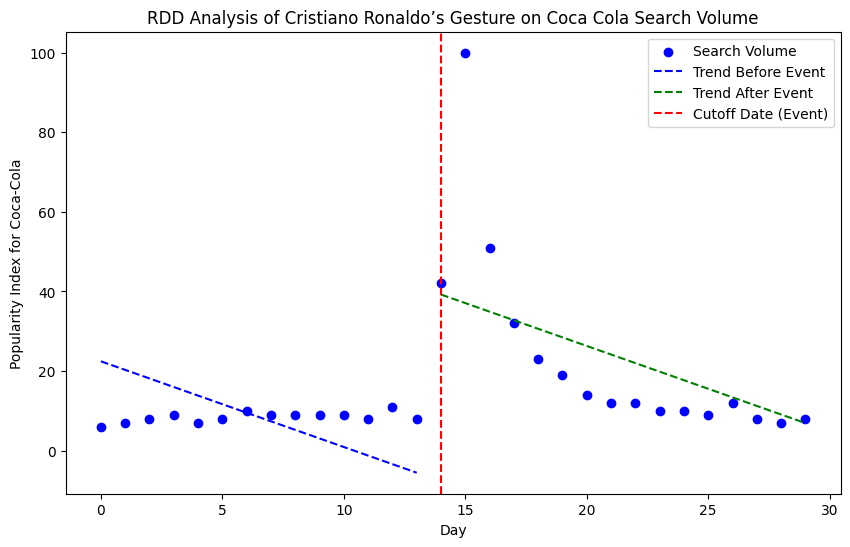

In [ ]:
cutoff_date = 14

# Create a binary variable for pre and post event
data['post_event'] = (data['time_numeric'] >= cutoff_date).astype(int)

# Running a simple RDD using linear regression
model = smf.ols ('popularity_index~ post_event + time_numeric', data=data).fit()

# Print the summary of the regression
print(model.summary())

before_event = data[data['time_numeric'] < cutoff_date]
after_event = data[data['time_numeric'] >= cutoff_date]

# Fitting linear models to each subset
before_model = smf.ols('popularity_index~ post_event + time_numeric', data=data).fit()
after_model = smf.ols('popularity_index~ post_event + time_numeric', data=data).fit()

# Calculate the fitted values (predicted values) from the models
before_event['fitted'] = before_model.fittedvalues
after_event['fitted'] = after_model.fittedvalues

# For plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['time_numeric'],  data[' Popularity Index'], color='blue', label='Search Volume')
plt.plot(before_event['time_numeric'], before_event['fitted'], color='blue', linestyle='--', label='Trend Before Event')
plt.plot(after_event['time_numeric'], after_event['fitted'], color='green', linestyle='--', label='Trend After Event')
plt.axvline(x=cutoff_date, color='red', linestyle='--', label='Cutoff Date (Event)')
plt.xlabel('Day')
plt.ylabel('Popularity Index for Coca-Cola')
plt.title('RDD Analysis of Cristiano Ronaldo’s Gesture on Coca Cola Search Volume')
plt.legend()
plt.show()


extra slope parameter, use the model class friday, multiply cutoff and running ,m add a polynomial. add squared terms to make them curved


Dependent Variable: popularity_index is your dependent variable, the one you are trying to explain or predict.
Model Coefficients:
Intercept (22.4308): This is the expected value of the popularity_index when all independent variables are 0. In the context of your analysis, it's the baseline popularity index before the event, adjusted for the time effect.
post_event (46.9467): This coefficient represents the average change in the popularity_index associated with the event (Ronaldo's gesture). It suggests that, on average, the popularity index increased by about 46.95 units after Ronaldo's event, holding the effect of time constant.
time_numeric (-2.1542): This coefficient indicates the rate of change in the popularity_index over time. It shows a decreasing trend of about -2.15 units in the popularity index for each unit increase in time.
R-squared (0.404): This value indicates that about 40.4% of the variability in the popularity_index is explained by your model. It's a measure of how well the independent variables are explaining the variation in your dependent variable.
Adjusted R-squared (0.360): This is a modified version of R-squared that adjusts for the number of predictors in the model. It's more reliable for comparing models with a different number of independent variables.
F-statistic (9.153) and Prob (F-statistic) (0.000923): The F-statistic tests the overall significance of the model. A low Prob (F-statistic) (here, less than 0.05) suggests that your model is statistically significant, i.e., it is better at explaining the variation in the dependent variable than a model with no independent variables.
P>|t|: The p-values for individual coefficients (for Intercept, post_event, time_numeric). P-values less than 0.05 (as in your case) suggest that the coefficients are statistically significant.
95% Confidence Interval ([0.025, 0.975]): This provides a range within which we can be 95% confident that the true coefficient lies. For post_event, it's between 24.224 and 69.669, indicating a high level of confidence in the effect of the event.
Diagnostics (Omnibus, Skew, Kurtosis, Durbin-Watson, Jarque-Bera): These are various tests for the assumptions of the regression model (like normality of residuals, autocorrelation). For instance, the Durbin-Watson statistic is close to 2, suggesting no major issues with autocorrelation.


                            OLS Regression Results                            
Dep. Variable:       popularity_index   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     9.153
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000923
Time:                        00:28:48   Log-Likelihood:                -122.64
No. Observations:                  30   AIC:                             251.3
Df Residuals:                      27   BIC:                             255.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.4308      5.808      3.862   

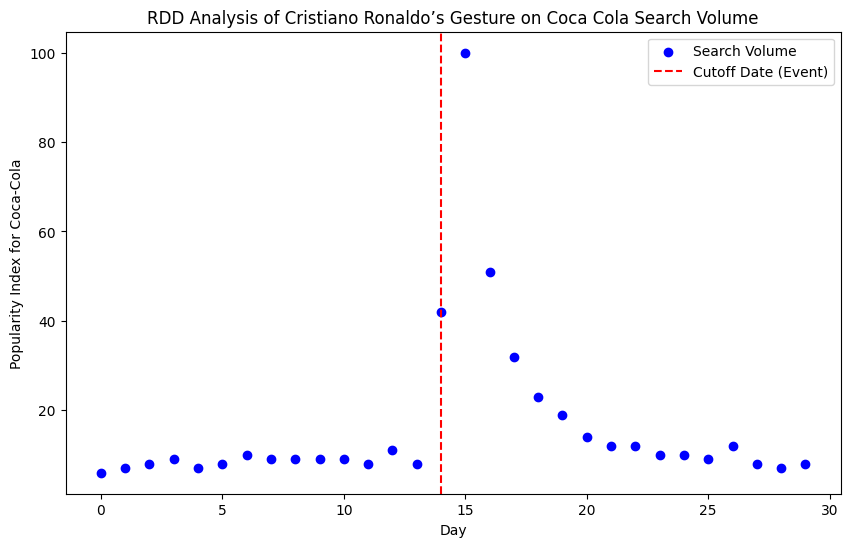

In [ ]:
cutoff_date = 14

# Create a binary variable for pre and post event
data['post_event'] = (data['time_numeric'] >= cutoff_date).astype(int)

# Running a simple RDD using linear regression
model = smf.ols ('popularity_index~ post_event + time_numeric', data=data).fit()

# Print the summary of the regression
print(model.summary())


# For plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['time_numeric'],  data[' Popularity Index'], color='blue', label='Search Volume')
plt.axvline(x=cutoff_date, color='red', linestyle='--', label='Cutoff Date (Event)')
plt.xlabel('Day')
plt.ylabel('Popularity Index for Coca-Cola')
plt.title('RDD Analysis of Cristiano Ronaldo’s Gesture on Coca Cola Search Volume')
plt.legend()
plt.show()